<a href="https://colab.research.google.com/github/reepasarkar2003/Air_Quality_index-Prediction/blob/main/Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading he data from csv file to pandas dataframe
air_quality_data=pd.read_csv('/content/AirQualityUCI.csv')

In [3]:
# first five rows of dataframe
air_quality_data.head()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
# last five rows of dataframe
air_quality_data.tail()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [5]:
air_quality_data.shape

(9357, 15)

In [ ]:
# getting some info we have about the data
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9357 non-null   object 
 1   Time    9357 non-null   object 
 2   CO      9357 non-null   float64
 3   PT08S1  9357 non-null   int64  
 4   NMHC    9357 non-null   int64  
 5   C6H6    9357 non-null   float64
 6   PT08S2  9357 non-null   int64  
 7   NOx     9357 non-null   int64  
 8   PT08S3  9357 non-null   int64  
 9   NO2     9357 non-null   int64  
 10  PT08S4  9357 non-null   int64  
 11  PT08S5  9357 non-null   int64  
 12  T       9357 non-null   float64
 13  RH      9357 non-null   float64
 14  AH      9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [6]:
# checking the number of the missing values in the dataframe
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO,0
PT08S1,0
NMHC,0
C6H6,0
PT08S2,0
NOx,0
PT08S3,0
NO2,0


###**This** **Shows** **that** **there** **are** **no** **mising** **values** **in** **the** **dataset** **but** **actual** **missing** **value** **are** **represented** **by**  -**200**
###**This** **is**  **described** **in** **UCI** **documentation**

In [7]:
# counting the number of times : -200 appeares in the data

air_quality_data.isin([-200]).sum(axis=0)




,0
Date,0
Time,0
CO,1683
PT08S1,366
NMHC,8443
C6H6,366
PT08S2,366
NOx,1639
PT08S3,366
NO2,1642


###**Handling** **the** **missing** **values**

### **convert -200 to NAN**

### **replace all NAN values with mean of that specific column**




In [8]:
air_quality_data=air_quality_data.replace(to_replace=-200 , value= np.NAN)

In [9]:
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO,1683
PT08S1,366
NMHC,8443
C6H6,366
PT08S2,366
NOx,1639
PT08S3,366
NO2,1642


**THis shows the actual number of missing values**

In [10]:
air_quality_data.tail()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [11]:
air_quality_data.iloc[1678]


,1678
Date,5/19/2004
Time,16:00:00
CO,2.5
PT08S1,1251.0
NMHC,NaN
C6H6,15.5
PT08S2,1165.0
NOx,144.0
PT08S3,747.0
NO2,135.0


In [12]:
# Calculate the mean excluding the first two columns by name
mean_values = air_quality_data.drop(columns=['Date','Time']).mean()

# Output the mean values
print(mean_values)


CO           2.152750
PT08S1    1099.833166
NMHC       218.811816
C6H6        10.083105
PT08S2     939.153376
NOx        246.896735
PT08S3     835.493605
NO2        113.091251
PT08S4    1456.264598
PT08S5    1022.906128
T           18.317829
RH          49.234201
AH           1.025530
dtype: float64


In [13]:
# replacing the missing values with the mean value in each column

#  Replace NaN values with the mean in the relevant columns
air_quality_data.iloc[:, 2:] = air_quality_data.iloc[:, 2:].fillna(mean_values)

# Output the modified DataFrame
print(air_quality_data)


           Date      Time   CO  PT08S1        NMHC  C6H6  PT08S2    NOx  \
0     3/10/2004  18:00:00  2.6  1360.0  150.000000  11.9  1046.0  166.0   
1     3/10/2004  19:00:00  2.0  1292.0  112.000000   9.4   955.0  103.0   
2     3/10/2004  20:00:00  2.2  1402.0   88.000000   9.0   939.0  131.0   
3     3/10/2004  21:00:00  2.2  1376.0   80.000000   9.2   948.0  172.0   
4     3/10/2004  22:00:00  1.6  1272.0   51.000000   6.5   836.0  131.0   
...         ...       ...  ...     ...         ...   ...     ...    ...   
9352   4/4/2005  10:00:00  3.1  1314.0  218.811816  13.5  1101.0  472.0   
9353   4/4/2005  11:00:00  2.4  1163.0  218.811816  11.4  1027.0  353.0   
9354   4/4/2005  12:00:00  2.4  1142.0  218.811816  12.4  1063.0  293.0   
9355   4/4/2005  13:00:00  2.1  1003.0  218.811816   9.5   961.0  235.0   
9356   4/4/2005  14:00:00  2.2  1071.0  218.811816  11.9  1047.0  265.0   

      PT08S3    NO2  PT08S4  PT08S5     T    RH      AH  
0     1056.0  113.0  1692.0  1268.0  13.6

In [14]:
air_quality_data.tail()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [15]:
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO,0
PT08S1,0
NMHC,0
C6H6,0
PT08S2,0
NOx,0
PT08S3,0
NO2,0


**Two task can be perform from the dataset **

*1. Forcasting *
*2 . Regressio*n

**Forcasting with FB prophet model**

In [16]:
# converting the date from DD/MM/YYYY to YYYY-MM-DD


date_info = pd.to_datetime(air_quality_data['Date'])
print(date_info)

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [17]:
time_info=air_quality_data['Time']

In [18]:
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [20]:
time_info=time_info.apply(lambda x:x.replace('-',':'))

In [21]:
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [23]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
# combinging 2 series to a pandas dataframe

date_time = pd.concat([date_info , time_info] , axis=1)

In [25]:
date_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [26]:
date_time.shape

(9357, 2)

In [27]:
# combining date and time

date_time['ds'] = date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)

In [28]:
print(date_time)

           Date      Time                   ds
0    2004-03-10  18:00:00  2004-03-10 18:00:00
1    2004-03-10  19:00:00  2004-03-10 19:00:00
2    2004-03-10  20:00:00  2004-03-10 20:00:00
3    2004-03-10  21:00:00  2004-03-10 21:00:00
4    2004-03-10  22:00:00  2004-03-10 22:00:00
...         ...       ...                  ...
9352 2005-04-04  10:00:00  2005-04-04 10:00:00
9353 2005-04-04  11:00:00  2005-04-04 11:00:00
9354 2005-04-04  12:00:00  2005-04-04 12:00:00
9355 2005-04-04  13:00:00  2005-04-04 13:00:00
9356 2005-04-04  14:00:00  2005-04-04 14:00:00

[9357 rows x 3 columns]


In [29]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


**We have to convert ds from object datatype to date time format**

In [30]:
data=pd.DataFrame()

In [31]:
data['ds']=pd.to_datetime(date_time['ds'])

In [34]:
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [36]:
data['y']=air_quality_data['RH']

In [37]:
data.head()

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6


In [38]:
pip install prophet

In [39]:
from prophet import Prophet

In [40]:
# traning the prophet model

model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqfyucd9/10gbez2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqfyucd9/izt0vygi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99014', 'data', 'file=/tmp/tmphqfyucd9/10gbez2p.json', 'init=/tmp/tmphqfyucd9/izt0vygi.json', 'output', 'file=/tmp/tmphqfyucd9/prophet_modelut7xn5y3/prophet_model-20240815144036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
future=model.make_future_dataframe(periods=365 , freq = 'H')
future.tail()

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [44]:
forecast = model.predict(future)
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,33.494204,17.657656,48.140092
9718,2005-04-19 16:00:00,33.977616,17.889782,49.899782
9719,2005-04-19 17:00:00,35.610862,20.406192,50.647985
9720,2005-04-19 18:00:00,38.506470,23.313185,53.616391
9721,2005-04-19 19:00:00,42.060689,26.320490,57.715223


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


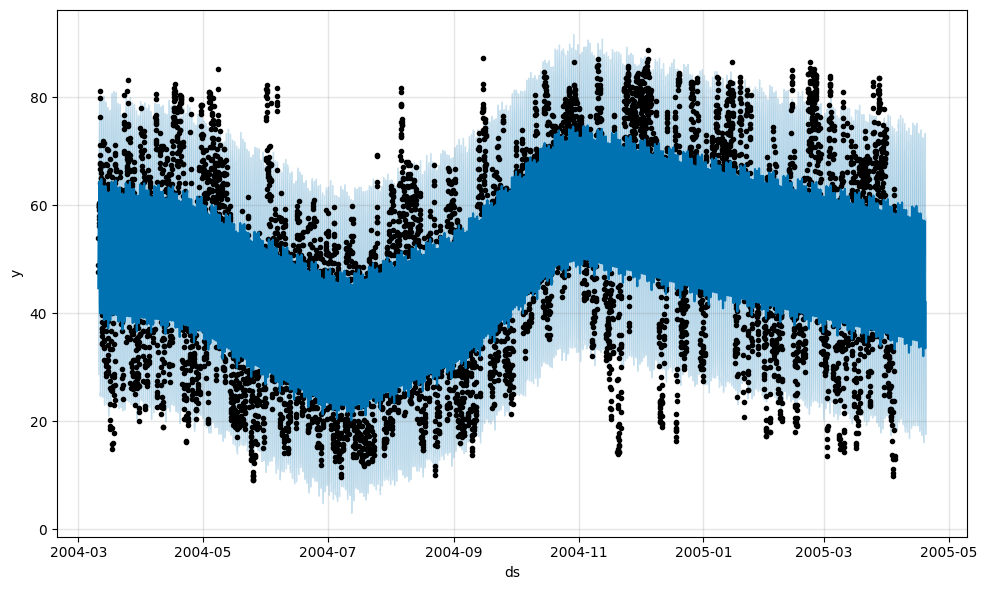

In [45]:
fig1=model.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

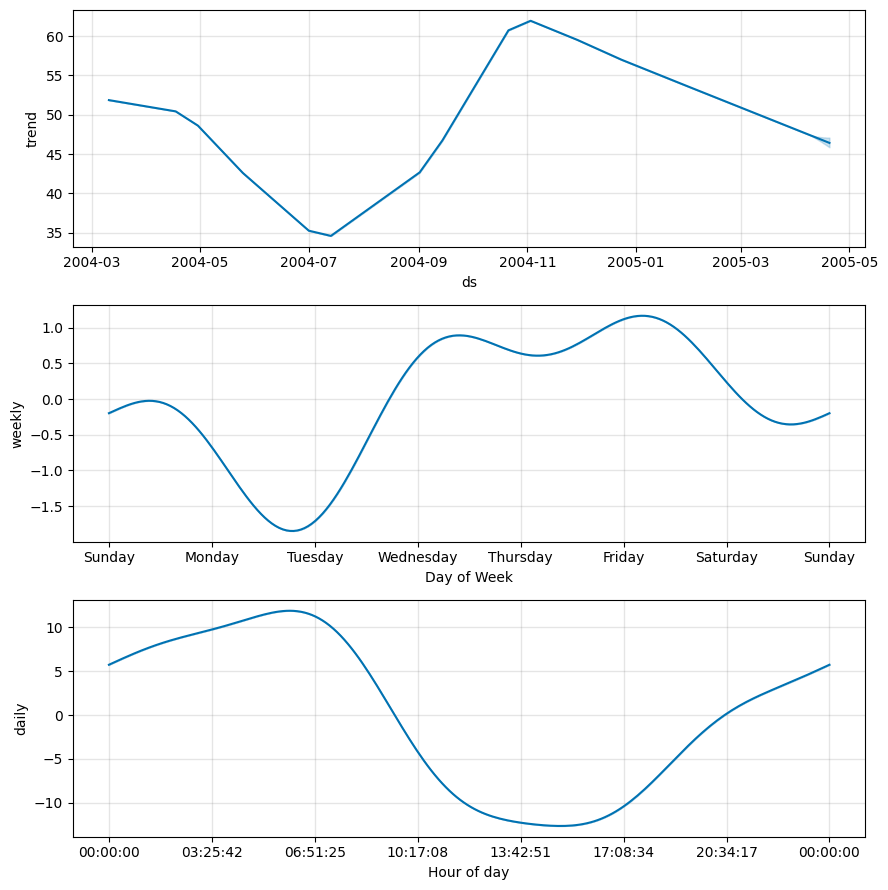

In [46]:
fig2 = model.plot_components(forecast)